<a href="https://colab.research.google.com/github/leesochang/Deeplearning2020/blob/master/717005_20142224_%EC%82%AC%ED%9A%8C%ED%95%99%EA%B3%BC_%EC%9D%B4%EC%86%8C%EC%B0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

데이터에서 데이터셋이 있다?

In [ ]:
from sklearn.datasets import make_circles
X, Y = make_circles(n_samples = 500, noise = 0.02)
#X.shape
#Y.shape

2D 를 3D로 볼 수 있도록 바꾸자

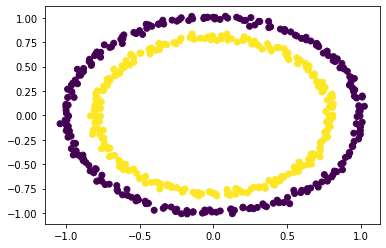

In [ ]:
X1 = X[:, 0]      #x축
X2 = X[:, 1]      #y축
plt.scatter(X1,X2, c = Y)

높이 속성을 부여 (중심에서 멀어질수록 높이를 높여주세요!)
feature (X3) 추가하여서 2차원 -> 3차원

In [ ]:
#X3 = X1**2 + X2**2           #중심에서 멀수록 더 높게
X3 = (X1**2 + X2**2)*(-1)     #중심에서 멀수록 더 낮게

3차원 그림 그리기

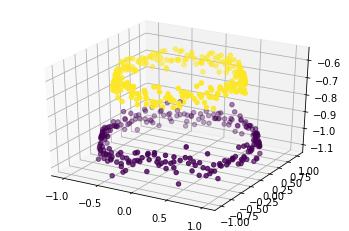

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X1, X2, X3, c = Y)

데이터 만들었으니 SVM 해보기
#SVM 테스트 #1

In [ ]:
from sklearn.svm import SVC
model1 = SVC(kernel = 'linear') 

In [ ]:
model1.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

자료를 통해서 그림을 그리는 함수 복사 붙여넣기

In [ ]:
def PlotSVM(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
    import matplotlib as mpl
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    fig = plt.figure(figsize=(10,10))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

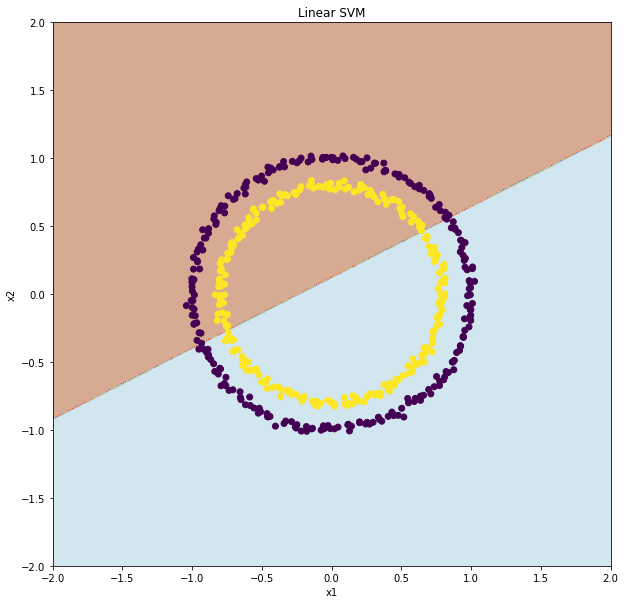

In [ ]:
PlotSVM(X, Y, model = model1, title = 'Linear SVM')

## SVM 테스트 #2
kerner을 이용

In [ ]:
X.shape

(500, 2)

In [ ]:
X2 = np.vstack(( X1, X2, X3)).T

In [ ]:
model2 = SVC (kernel = 'linear')

In [ ]:
model2.fit(X2, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def PlotSVM3D(X, Y, model):
  import numpy as np
  X1 = X[:, 0]
  X2 = X[:, 1]
  X3 = X[:, 2]
  w = model.coef_ 
  b = model.intercept_ 

  x1, x2 = np.meshgrid(X1, X2) 
  x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

  fig = plt.figure() 
  axes2 = fig.add_subplot(111, projection = '3d') 
  axes2.scatter(X1, X2, X3, c = Y) 
  axes1 = fig.gca(projection = '3d') 
  axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
  #plt.show()

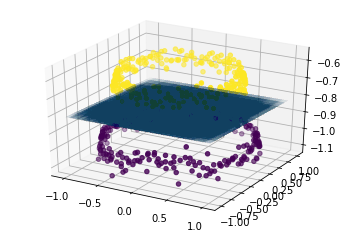

In [ ]:
PlotSVM3D(X2, Y, model = model2)

## SVM 테스트 #3
원형의 칼(RBF SVM)

In [ ]:
model3 = SVC (kernel = 'rbf')

In [ ]:
model3.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

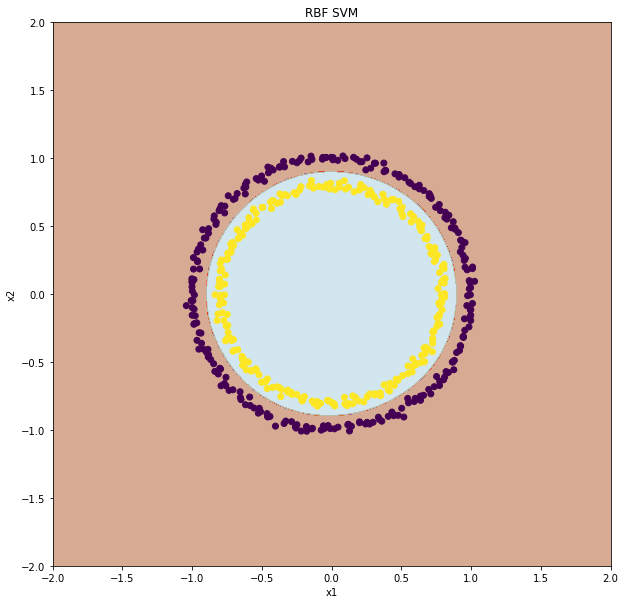

In [ ]:
PlotSVM(X, Y, model = model3, title = 'RBF SVM')